In [1]:
from Model.DCVAE import DCVAE_Inc
from Model.Utils import PlotHistory, PlotDataAE, Save_Model
from Model.Utils import load_from_tfrecords, convert_to_tfrecords, load_numpy
from keras.optimizers import RMSprop,Adam
import numpy as np
import tensorflow as tf
import os
%matplotlib notebook

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


# Load DataSet

In [2]:
load_tfrecords = True 
create_tfrecords = False

path_tfr = 'DataSet/MPS100'
path_npy = '/share/GeoFacies/DataSet/MPS100/MPS100.npy'
batch_size = 32

In [3]:
if load_tfrecords:
    if create_tfrecords: 
        x_train, x_test = load_numpy(path_npy,random_state=0,split_data=0.30)
        convert_to_tfrecords(path_tfr, x_train, x_test)
        gen_train, gen_test = load_from_tfrecords(path_tfr, batch_size)
    else:
        try:
            gen_train, gen_test = load_from_tfrecords(path_tfr, batch_size)
        except:
            print("Data not found. Change 'create_tfrecords' to True")
else:
    x_train, x_test = load_numpy(path_npy,random_state=0,split_data=0.30)

# Create Convolutional Variational Autoencoder

In [4]:
path_weights = os.path.join(path_tfr, 'w100_Inc.hdf5')

model = DCVAE_Inc(input_shape=(100, 100, 2),kernel_init=64,latent_dim=500,opt=RMSprop(lr=0.0005),
                  scheduler=True,filepath=path_weights)

# Training Network

In [5]:
num_epochs = 500

if load_tfrecords:
    x_train = gen_train.mps_generator()
    x_val = gen_test.mps_generator()
    model.fit_generator(x_train,
                        num_epochs=num_epochs, verbose=1, 
                        steps_per_epoch = len(gen_train),
                        val_set = x_val,
                        validation_steps = len(gen_test))
else:
    model.fit(x_train, num_epochs=num_epochs, batch_size = batch_size, x_v=x_test,verbose=1) 

Setting up model...
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 100, 100, 2)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 100, 100, 64) 192         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 100, 100, 32) 2080        conv2d_1[0][0]                   
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 100, 100, 32) 128         conv2d_2

Instructions for updating:
Use tf.cast instead.


Epoch 1/500


875/875 [==============================] - 385s 440ms/step - loss: 344827.7252 - acc_pred: 0.6806 - val_loss: 8176.4038 - val_acc_pred: 0.6402
Epoch 2/500


875/875 [==============================] - 367s 419ms/step - loss: 6175.6605 - acc_pred: 0.6842 - val_loss: 6390.6741 - val_acc_pred: 0.6711
Epoch 3/500


875/875 [==============================] - 367s 420ms/step - loss: 5391.5981 - acc_pred: 0.7284 - val_loss: 5268.4818 - val_acc_pred: 0.7336
Epoch 4/500


875/875 [==============================] - 367s 420ms/step - loss: 4735.1798 - acc_pred: 0.7714 - val_loss: 5143.0874 - val_acc_pred: 0.7463
Epoch 5/500


875/875 [==============================] - 367s 420ms/step - loss: 4278.1515 - acc_pred: 0.8015 - val_loss: 4657.8631 - val_acc_pred: 0.7770
Epoch 6/500


875/875 [==============================] - 367s 419ms/step - loss: 3951.9444 - acc_pred: 0.8222 - val_loss: 3883.0103 - val_acc_pred: 0.8239
Epoch 7/500


875/875 [==============================] - 367s 420ms/step - loss: 3704.0130 - acc_pred: 0.8370 - val_loss: 3506.7778 - val_acc_pred: 0.8475
Epoch 8/500


875/875 [==============================] - 367s 420ms/step - loss: 3513.0864 - acc_pred: 0.8478 - val_loss: 3371.4722 - val_acc_pred: 0.8583
Epoch 9/500


875/875 [==============================] - 367s 419ms/step - loss: 3374.8343 - acc_pred: 0.8551 - val_loss: 3200.7371 - val_acc_pred: 0.8644
Epoch 10/500


875/875 [==============================] - 365s 417ms/step - loss: 3246.2616 - acc_pred: 0.8618 - val_loss: 3129.2367 - val_acc_pred: 0.8681
Epoch 11/500


875/875 [==============================] - 365s 417ms/step - loss: 3131.2474 - acc_pred: 0.8678 - val_loss: 2835.8876 - val_acc_pred: 0.8838
Epoch 12/500


875/875 [==============================] - 365s 418ms/step - loss: 3040.2108 - acc_pred: 0.8724 - val_loss: 2904.2749 - val_acc_pred: 0.8799
Epoch 13/500


875/875 [==============================] - 364s 417ms/step - loss: 2967.0027 - acc_pred: 0.8760 - val_loss: 2708.1266 - val_acc_pred: 0.8892
Epoch 14/500


875/875 [==============================] - 364s 416ms/step - loss: 2901.9478 - acc_pred: 0.8791 - val_loss: 2891.1120 - val_acc_pred: 0.8799
Epoch 15/500


875/875 [==============================] - 364s 416ms/step - loss: 2846.0260 - acc_pred: 0.8819 - val_loss: 2630.0876 - val_acc_pred: 0.8924
Epoch 16/500


875/875 [==============================] - 364s 416ms/step - loss: 2792.1798 - acc_pred: 0.8844 - val_loss: 2628.1507 - val_acc_pred: 0.8922
Epoch 17/500


875/875 [==============================] - 364s 416ms/step - loss: 2740.3862 - acc_pred: 0.8869 - val_loss: 2562.8161 - val_acc_pred: 0.8968
Epoch 18/500


875/875 [==============================] - 364s 415ms/step - loss: 2697.5716 - acc_pred: 0.8890 - val_loss: 2481.9877 - val_acc_pred: 0.8980
Epoch 19/500


875/875 [==============================] - 364s 416ms/step - loss: 2655.5395 - acc_pred: 0.8909 - val_loss: 2494.7780 - val_acc_pred: 0.8991
Epoch 20/500


875/875 [==============================] - 364s 415ms/step - loss: 2610.9266 - acc_pred: 0.8929 - val_loss: 2438.6090 - val_acc_pred: 0.9015
Epoch 21/500


875/875 [==============================] - 364s 416ms/step - loss: 2576.7632 - acc_pred: 0.8945 - val_loss: 2360.0955 - val_acc_pred: 0.9050
Epoch 22/500


875/875 [==============================] - 365s 417ms/step - loss: 2540.6106 - acc_pred: 0.8962 - val_loss: 2465.9239 - val_acc_pred: 0.8981
Epoch 23/500


875/875 [==============================] - 363s 415ms/step - loss: 2504.7263 - acc_pred: 0.8979 - val_loss: 2316.6104 - val_acc_pred: 0.9073
Epoch 24/500


875/875 [==============================] - 364s 416ms/step - loss: 2475.6842 - acc_pred: 0.8992 - val_loss: 2305.3072 - val_acc_pred: 0.9074
Epoch 25/500


875/875 [==============================] - 363s 415ms/step - loss: 2445.6121 - acc_pred: 0.9006 - val_loss: 2263.5249 - val_acc_pred: 0.9100
Epoch 26/500


875/875 [==============================] - 363s 415ms/step - loss: 2416.3694 - acc_pred: 0.9020 - val_loss: 2219.3076 - val_acc_pred: 0.9128
Epoch 27/500


875/875 [==============================] - 364s 416ms/step - loss: 2390.9110 - acc_pred: 0.9032 - val_loss: 2384.5298 - val_acc_pred: 0.9046
Epoch 28/500


875/875 [==============================] - 364s 416ms/step - loss: 2362.6223 - acc_pred: 0.9045 - val_loss: 2176.8996 - val_acc_pred: 0.9133
Epoch 29/500


875/875 [==============================] - 365s 417ms/step - loss: 2338.7460 - acc_pred: 0.9056 - val_loss: 2208.3534 - val_acc_pred: 0.9133
Epoch 30/500


875/875 [==============================] - 366s 419ms/step - loss: 2315.8479 - acc_pred: 0.9067 - val_loss: 2157.7441 - val_acc_pred: 0.9133
Epoch 31/500


875/875 [==============================] - 367s 419ms/step - loss: 2293.7616 - acc_pred: 0.9077 - val_loss: 2122.1301 - val_acc_pred: 0.9163
Epoch 32/500


875/875 [==============================] - 364s 416ms/step - loss: 2275.2126 - acc_pred: 0.9086 - val_loss: 2170.1066 - val_acc_pred: 0.9138
Epoch 33/500


875/875 [==============================] - 364s 415ms/step - loss: 2254.1620 - acc_pred: 0.9095 - val_loss: 2074.4615 - val_acc_pred: 0.9176
Epoch 34/500


875/875 [==============================] - 364s 416ms/step - loss: 2234.0212 - acc_pred: 0.9105 - val_loss: 2056.4071 - val_acc_pred: 0.9195
Epoch 35/500


875/875 [==============================] - 364s 416ms/step - loss: 2216.5055 - acc_pred: 0.9113 - val_loss: 2077.0513 - val_acc_pred: 0.9173
Epoch 36/500


875/875 [==============================] - 363s 415ms/step - loss: 2202.3208 - acc_pred: 0.9120 - val_loss: 2049.7079 - val_acc_pred: 0.9197
Epoch 37/500


875/875 [==============================] - 364s 416ms/step - loss: 2185.3593 - acc_pred: 0.9127 - val_loss: 2066.8674 - val_acc_pred: 0.9184
Epoch 38/500


875/875 [==============================] - 364s 416ms/step - loss: 2170.6054 - acc_pred: 0.9134 - val_loss: 2051.8024 - val_acc_pred: 0.9188
Epoch 39/500


875/875 [==============================] - 364s 416ms/step - loss: 2154.4781 - acc_pred: 0.9142 - val_loss: 2020.7522 - val_acc_pred: 0.9208
Epoch 40/500


875/875 [==============================] - 364s 416ms/step - loss: 2143.4010 - acc_pred: 0.9146 - val_loss: 2023.5938 - val_acc_pred: 0.9191
Epoch 41/500


875/875 [==============================] - 364s 415ms/step - loss: 2128.6665 - acc_pred: 0.9153 - val_loss: 1983.8901 - val_acc_pred: 0.9217
Epoch 42/500


875/875 [==============================] - 364s 416ms/step - loss: 2116.0625 - acc_pred: 0.9159 - val_loss: 1978.9292 - val_acc_pred: 0.9231
Epoch 43/500


875/875 [==============================] - 364s 415ms/step - loss: 2105.0771 - acc_pred: 0.9164 - val_loss: 1995.9295 - val_acc_pred: 0.9214
Epoch 44/500


875/875 [==============================] - 363s 415ms/step - loss: 2091.9781 - acc_pred: 0.9170 - val_loss: 1983.6791 - val_acc_pred: 0.9222
Epoch 45/500


875/875 [==============================] - 364s 416ms/step - loss: 2081.7263 - acc_pred: 0.9175 - val_loss: 2023.0143 - val_acc_pred: 0.9212
Epoch 46/500


875/875 [==============================] - 363s 415ms/step - loss: 2069.2426 - acc_pred: 0.9181 - val_loss: 1988.5671 - val_acc_pred: 0.9213
Epoch 47/500


875/875 [==============================] - 364s 416ms/step - loss: 2061.2515 - acc_pred: 0.9184 - val_loss: 1965.5694 - val_acc_pred: 0.9229
Epoch 48/500


875/875 [==============================] - 364s 415ms/step - loss: 2050.2951 - acc_pred: 0.9189 - val_loss: 1942.9466 - val_acc_pred: 0.9242
Epoch 49/500


875/875 [==============================] - 364s 416ms/step - loss: 2039.6727 - acc_pred: 0.9194 - val_loss: 1980.3604 - val_acc_pred: 0.9226
Epoch 50/500


875/875 [==============================] - 364s 416ms/step - loss: 2030.6565 - acc_pred: 0.9198 - val_loss: 1929.4584 - val_acc_pred: 0.9252
Epoch 51/500


875/875 [==============================] - 364s 415ms/step - loss: 2023.0627 - acc_pred: 0.9201 - val_loss: 1941.5557 - val_acc_pred: 0.9241
Epoch 52/500


875/875 [==============================] - 364s 415ms/step - loss: 2012.6857 - acc_pred: 0.9206 - val_loss: 2066.5137 - val_acc_pred: 0.9204
Epoch 53/500


875/875 [==============================] - 364s 416ms/step - loss: 2002.5858 - acc_pred: 0.9210 - val_loss: 1943.2479 - val_acc_pred: 0.9229
Epoch 54/500


875/875 [==============================] - 364s 415ms/step - loss: 1995.3330 - acc_pred: 0.9214 - val_loss: 1946.1128 - val_acc_pred: 0.9254
Epoch 55/500


875/875 [==============================] - 367s 419ms/step - loss: 1986.7278 - acc_pred: 0.9217 - val_loss: 1953.1292 - val_acc_pred: 0.9232

Epoch 00055: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 56/500


875/875 [==============================] - 364s 416ms/step - loss: 1918.9401 - acc_pred: 0.9247 - val_loss: 1831.4065 - val_acc_pred: 0.9287
Epoch 57/500


875/875 [==============================] - 364s 416ms/step - loss: 1900.2034 - acc_pred: 0.9256 - val_loss: 1831.5293 - val_acc_pred: 0.9291
Epoch 58/500


875/875 [==============================] - 364s 416ms/step - loss: 1891.0048 - acc_pred: 0.9260 - val_loss: 1863.8782 - val_acc_pred: 0.9279
Epoch 59/500


875/875 [==============================] - 364s 416ms/step - loss: 1883.8337 - acc_pred: 0.9263 - val_loss: 1829.8320 - val_acc_pred: 0.9288
Epoch 60/500


875/875 [==============================] - 363s 415ms/step - loss: 1877.5920 - acc_pred: 0.9266 - val_loss: 1842.5770 - val_acc_pred: 0.9282
Epoch 61/500


875/875 [==============================] - 363s 415ms/step - loss: 1871.7192 - acc_pred: 0.9269 - val_loss: 1829.3136 - val_acc_pred: 0.9293
Epoch 62/500


875/875 [==============================] - 364s 416ms/step - loss: 1864.6757 - acc_pred: 0.9272 - val_loss: 1829.5436 - val_acc_pred: 0.9289
Epoch 63/500


875/875 [==============================] - 363s 415ms/step - loss: 1860.1218 - acc_pred: 0.9274 - val_loss: 1825.4023 - val_acc_pred: 0.9293
Epoch 64/500


875/875 [==============================] - 364s 416ms/step - loss: 1854.8789 - acc_pred: 0.9276 - val_loss: 1827.4313 - val_acc_pred: 0.9289
Epoch 65/500


875/875 [==============================] - 364s 416ms/step - loss: 1849.1526 - acc_pred: 0.9279 - val_loss: 1864.3125 - val_acc_pred: 0.9284
Epoch 66/500


875/875 [==============================] - 367s 420ms/step - loss: 1843.8831 - acc_pred: 0.9281 - val_loss: 1832.3121 - val_acc_pred: 0.9286
Epoch 67/500


875/875 [==============================] - 365s 417ms/step - loss: 1840.6852 - acc_pred: 0.9282 - val_loss: 2021.4363 - val_acc_pred: 0.9215
Epoch 68/500


875/875 [==============================] - 364s 416ms/step - loss: 1834.9367 - acc_pred: 0.9285 - val_loss: 1828.8768 - val_acc_pred: 0.9283

Epoch 00068: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
Epoch 69/500


875/875 [==============================] - 364s 416ms/step - loss: 1805.6800 - acc_pred: 0.9298 - val_loss: 1797.4484 - val_acc_pred: 0.9299
Epoch 70/500


875/875 [==============================] - 364s 416ms/step - loss: 1796.4378 - acc_pred: 0.9302 - val_loss: 1795.9862 - val_acc_pred: 0.9305
Epoch 71/500


875/875 [==============================] - 367s 420ms/step - loss: 1790.8859 - acc_pred: 0.9305 - val_loss: 1802.2125 - val_acc_pred: 0.9299
Epoch 72/500


875/875 [==============================] - 365s 418ms/step - loss: 1787.3839 - acc_pred: 0.9306 - val_loss: 1795.6476 - val_acc_pred: 0.9304
Epoch 73/500


875/875 [==============================] - 364s 416ms/step - loss: 1783.7934 - acc_pred: 0.9308 - val_loss: 1810.0552 - val_acc_pred: 0.9303
Epoch 74/500


875/875 [==============================] - 364s 416ms/step - loss: 1781.1356 - acc_pred: 0.9309 - val_loss: 1795.5460 - val_acc_pred: 0.9302
Epoch 75/500


875/875 [==============================] - 364s 416ms/step - loss: 1776.2546 - acc_pred: 0.9311 - val_loss: 1800.4614 - val_acc_pred: 0.9302
Epoch 76/500


875/875 [==============================] - 364s 416ms/step - loss: 1776.1617 - acc_pred: 0.9311 - val_loss: 1798.7559 - val_acc_pred: 0.9302
Epoch 77/500


875/875 [==============================] - 363s 415ms/step - loss: 1771.1079 - acc_pred: 0.9313 - val_loss: 1808.0726 - val_acc_pred: 0.9301
Epoch 78/500


875/875 [==============================] - 364s 416ms/step - loss: 1767.3940 - acc_pred: 0.9315 - val_loss: 1804.0347 - val_acc_pred: 0.9299
Epoch 79/500


875/875 [==============================] - 363s 415ms/step - loss: 1766.2269 - acc_pred: 0.9315 - val_loss: 1803.3074 - val_acc_pred: 0.9300

Epoch 00079: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
Epoch 80/500


875/875 [==============================] - 363s 415ms/step - loss: 1750.8748 - acc_pred: 0.9323 - val_loss: 1789.3872 - val_acc_pred: 0.9307
Epoch 81/500


875/875 [==============================] - 363s 415ms/step - loss: 1746.7959 - acc_pred: 0.9324 - val_loss: 1787.2340 - val_acc_pred: 0.9307
Epoch 82/500


875/875 [==============================] - 364s 416ms/step - loss: 1744.9914 - acc_pred: 0.9325 - val_loss: 1789.1327 - val_acc_pred: 0.9304
Epoch 83/500


875/875 [==============================] - 364s 416ms/step - loss: 1741.0715 - acc_pred: 0.9327 - val_loss: 1790.8010 - val_acc_pred: 0.9305
Epoch 84/500


875/875 [==============================] - 363s 415ms/step - loss: 1741.4735 - acc_pred: 0.9327 - val_loss: 1790.0641 - val_acc_pred: 0.9306
Epoch 85/500


875/875 [==============================] - 364s 416ms/step - loss: 1738.1285 - acc_pred: 0.9328 - val_loss: 1793.1450 - val_acc_pred: 0.9306
Epoch 86/500


875/875 [==============================] - 364s 416ms/step - loss: 1737.3471 - acc_pred: 0.9329 - val_loss: 1793.1222 - val_acc_pred: 0.9304

Epoch 00086: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.
Epoch 87/500


875/875 [==============================] - 364s 415ms/step - loss: 1730.7602 - acc_pred: 0.9331 - val_loss: 1785.4162 - val_acc_pred: 0.9308
Epoch 88/500


875/875 [==============================] - 364s 416ms/step - loss: 1728.4034 - acc_pred: 0.9332 - val_loss: 1784.4090 - val_acc_pred: 0.9308
Epoch 89/500


875/875 [==============================] - 364s 415ms/step - loss: 1725.7721 - acc_pred: 0.9333 - val_loss: 1786.8444 - val_acc_pred: 0.9308
Epoch 90/500


875/875 [==============================] - 364s 416ms/step - loss: 1724.6301 - acc_pred: 0.9334 - val_loss: 1786.1278 - val_acc_pred: 0.9308
Epoch 91/500


875/875 [==============================] - 364s 415ms/step - loss: 1724.1963 - acc_pred: 0.9334 - val_loss: 1785.2309 - val_acc_pred: 0.9310
Epoch 92/500


875/875 [==============================] - 363s 415ms/step - loss: 1722.8142 - acc_pred: 0.9335 - val_loss: 1787.1383 - val_acc_pred: 0.9306
Epoch 93/500


875/875 [==============================] - 363s 415ms/step - loss: 1721.5815 - acc_pred: 0.9335 - val_loss: 1785.3261 - val_acc_pred: 0.9308

Epoch 00093: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.
Epoch 94/500


875/875 [==============================] - 364s 416ms/step - loss: 1718.0573 - acc_pred: 0.9337 - val_loss: 1784.9021 - val_acc_pred: 0.9309
Epoch 95/500


875/875 [==============================] - 364s 416ms/step - loss: 1717.3553 - acc_pred: 0.9337 - val_loss: 1782.9569 - val_acc_pred: 0.9309
Epoch 96/500


875/875 [==============================] - 364s 416ms/step - loss: 1718.1494 - acc_pred: 0.9337 - val_loss: 1784.6308 - val_acc_pred: 0.9309
Epoch 97/500


875/875 [==============================] - 363s 415ms/step - loss: 1715.7550 - acc_pred: 0.9338 - val_loss: 1783.7375 - val_acc_pred: 0.9309
Epoch 98/500


875/875 [==============================] - 364s 416ms/step - loss: 1716.2961 - acc_pred: 0.9338 - val_loss: 1784.9931 - val_acc_pred: 0.9309
Epoch 99/500


875/875 [==============================] - 364s 416ms/step - loss: 1715.3585 - acc_pred: 0.9338 - val_loss: 1784.8302 - val_acc_pred: 0.9309
Epoch 100/500


875/875 [==============================] - 364s 416ms/step - loss: 1714.1080 - acc_pred: 0.9339 - val_loss: 1784.2472 - val_acc_pred: 0.9309

Epoch 00100: ReduceLROnPlateau reducing learning rate to 7.812500371073838e-06.
Epoch 101/500


875/875 [==============================] - 364s 416ms/step - loss: 1713.1928 - acc_pred: 0.9339 - val_loss: 1783.9615 - val_acc_pred: 0.9309
Epoch 102/500


875/875 [==============================] - 363s 415ms/step - loss: 1712.7693 - acc_pred: 0.9340 - val_loss: 1785.1629 - val_acc_pred: 0.9308
Epoch 103/500


875/875 [==============================] - 364s 416ms/step - loss: 1711.4427 - acc_pred: 0.9340 - val_loss: 1782.8870 - val_acc_pred: 0.9309
Epoch 104/500


875/875 [==============================] - 364s 416ms/step - loss: 1711.4231 - acc_pred: 0.9340 - val_loss: 1783.3652 - val_acc_pred: 0.9309
Epoch 105/500


875/875 [==============================] - 364s 416ms/step - loss: 1711.8140 - acc_pred: 0.9340 - val_loss: 1783.7181 - val_acc_pred: 0.9309
Epoch 106/500


875/875 [==============================] - 364s 416ms/step - loss: 1710.4675 - acc_pred: 0.9341 - val_loss: 1783.6820 - val_acc_pred: 0.9309
Epoch 107/500


875/875 [==============================] - 364s 416ms/step - loss: 1712.6260 - acc_pred: 0.9339 - val_loss: 1783.6707 - val_acc_pred: 0.9309
Epoch 108/500


875/875 [==============================] - 364s 416ms/step - loss: 1710.8922 - acc_pred: 0.9340 - val_loss: 1782.4219 - val_acc_pred: 0.9310
Epoch 109/500


875/875 [==============================] - 364s 416ms/step - loss: 1710.3364 - acc_pred: 0.9340 - val_loss: 1783.7209 - val_acc_pred: 0.9309
Epoch 110/500


875/875 [==============================] - 363s 415ms/step - loss: 1710.9231 - acc_pred: 0.9340 - val_loss: 1784.3173 - val_acc_pred: 0.9309
Epoch 111/500


875/875 [==============================] - 364s 416ms/step - loss: 1709.1719 - acc_pred: 0.9341 - val_loss: 1783.9524 - val_acc_pred: 0.9309
Epoch 112/500


875/875 [==============================] - 364s 416ms/step - loss: 1710.1376 - acc_pred: 0.9341 - val_loss: 1783.6624 - val_acc_pred: 0.9309
Epoch 113/500


875/875 [==============================] - 364s 416ms/step - loss: 1710.1088 - acc_pred: 0.9341 - val_loss: 1784.3332 - val_acc_pred: 0.9309

Epoch 00113: ReduceLROnPlateau reducing learning rate to 3.906250185536919e-06.
Epoch 114/500


875/875 [==============================] - 364s 416ms/step - loss: 1707.8597 - acc_pred: 0.9342 - val_loss: 1783.4599 - val_acc_pred: 0.9309
Epoch 115/500


875/875 [==============================] - 363s 415ms/step - loss: 1709.2424 - acc_pred: 0.9341 - val_loss: 1783.8955 - val_acc_pred: 0.9309
Epoch 116/500


875/875 [==============================] - 364s 416ms/step - loss: 1707.9537 - acc_pred: 0.9342 - val_loss: 1783.0169 - val_acc_pred: 0.9309
Epoch 117/500


875/875 [==============================] - 364s 416ms/step - loss: 1708.2442 - acc_pred: 0.9342 - val_loss: 1783.5004 - val_acc_pred: 0.9309
Epoch 118/500


875/875 [==============================] - 364s 416ms/step - loss: 1708.2155 - acc_pred: 0.9341 - val_loss: 1783.6023 - val_acc_pred: 0.9309

Epoch 00118: ReduceLROnPlateau reducing learning rate to 1.9531250927684596e-06.



# Ploting Train History

val_loss   :  [1783.4598619791666, 1783.8955491536458, 1783.0168873697917, 1783.500425455729]
loss   :  [1707.8597075892858, 1709.242426060268, 1707.9536665736607, 1708.2442138671875]


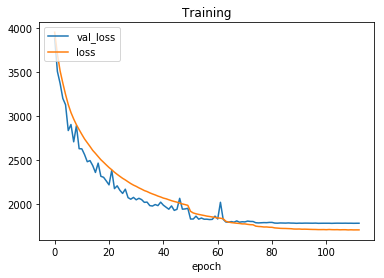

In [6]:
PlotHistory(model.history.history,listKeys=['val_loss','loss']) 

lr   :  [3.90625e-06, 3.90625e-06, 3.90625e-06, 3.90625e-06]


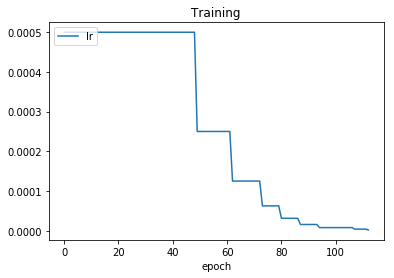

In [7]:
PlotHistory(model.history.history,listKeys=['lr'])

val_acc_pred   :  [0.9309274835586547, 0.9309108416239421, 0.9309331912994385, 0.9309227172533671]
acc_pred   :  [0.934169254234859, 0.9341148709569659, 0.9341702643121992, 0.9341682755606515]


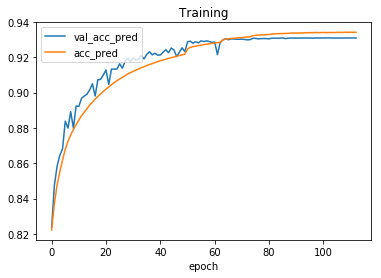

In [8]:
PlotHistory(model.history.history,listKeys=['val_acc_pred','acc_pred'])

# Evaluate Model with Test dataset 

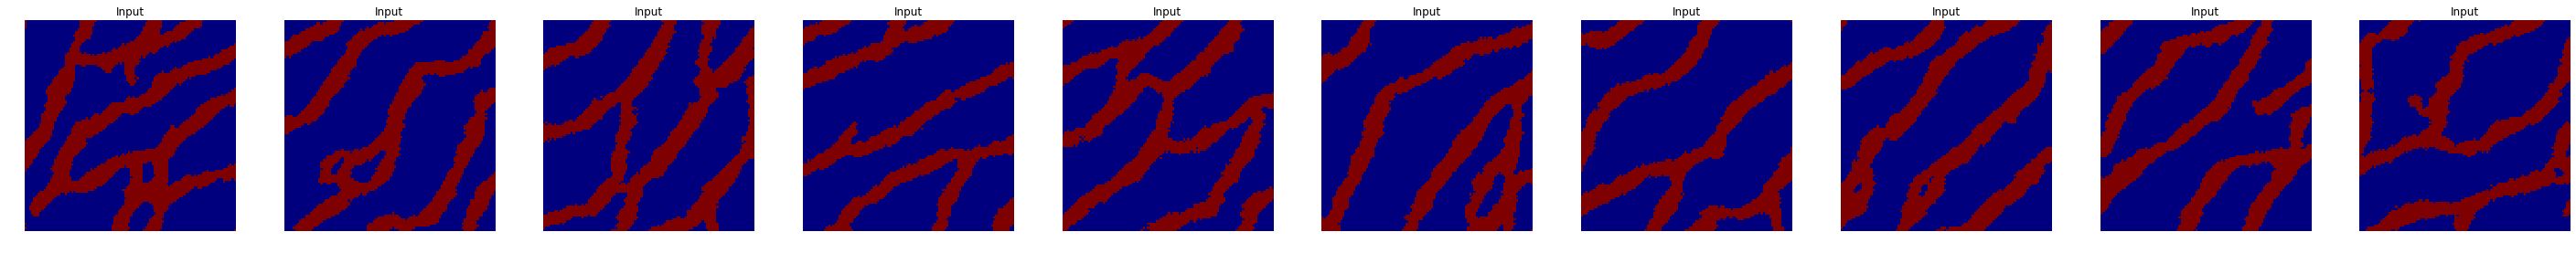

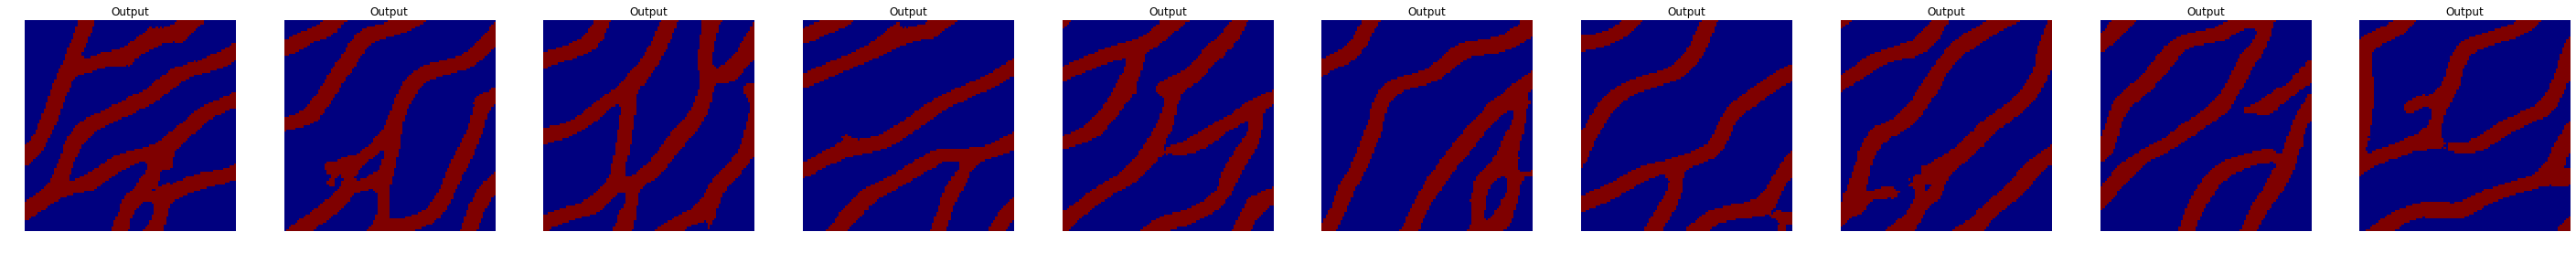

In [9]:
if load_tfrecords:
    x_test = gen_test.get_numpy_batch()

x_rec = model.model.predict(x_test)
PlotDataAE(np.argmax(x_test[:,:,:,:],axis=-1),np.argmax(x_rec[:,:,:,:],axis=-1),digit_size=(100,100))

# Generate random sampling

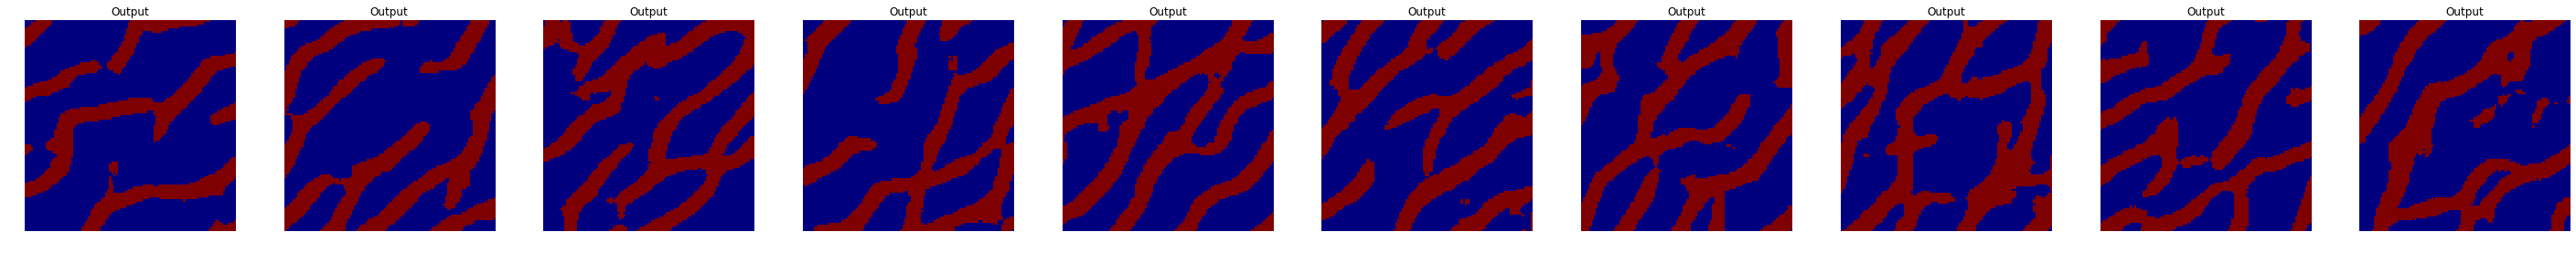

In [10]:
x_gen=model.generate(binary=True)
PlotDataAE([],x_gen[:,:,:],Only_Result=False,digit_size=(100,100))